<a href="https://colab.research.google.com/github/Anshad-Aziz/Disaster-Tweets/blob/main/Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [2]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [4]:
!pip install unidecode
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.5 MB/s eta 0:00:00


In [5]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.util import ngrams

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Bidirectional,LSTM,SimpleRNN,Embedding
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences



In [7]:
df=pd.read_csv('/content/tweets.csv')

In [8]:
df.head(5)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [9]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [11]:
df['keyword'].nunique()

219

In [12]:
df['text'][0]

'Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'

In [13]:
df=df[['text','target']]
df

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [14]:
df['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

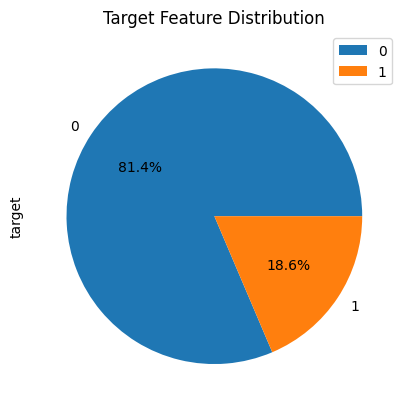

In [15]:
df['target'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Target Feature Distribution")
plt.legend()
plt.show()

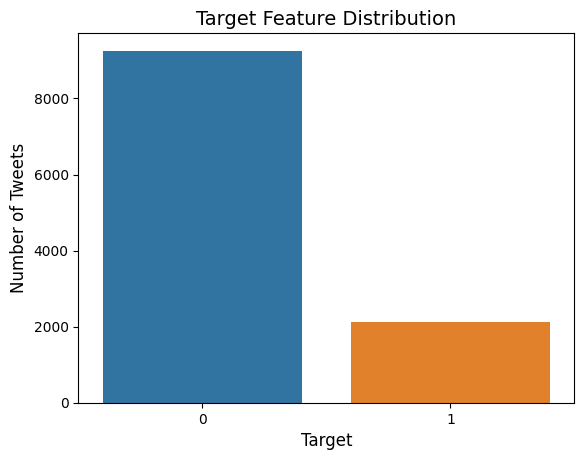

In [16]:

sns.countplot(x=df['target'])
plt.title("Target Feature Distribution", fontsize=14)
plt.xlabel("Target", fontsize=12)
plt.ylabel("Number of Tweets",fontsize=12)
plt.show()

In [17]:
def remove_blank(text):
  data=text.replace("\\n","").replace("\t","")
  return data

def expand_text(text):
  data=fix(text)
  return data

stopwords_list=stopwords.words('english')
stopwords_list.remove("nor")
stopwords_list.remove("not")
stopwords_list.remove("no")

def handling_accented_chr(text):
  data=unidecode(text)
  return data

def clean_text(text):
  tokens=word_tokenize(text)
  data=[i.lower() for i in tokens]
  data=[i for i in data if i not in punctuation]
  data=[i for i in data if i not in stopwords_list]
  data=[i for i in data if i.isalpha()]
  data=[i for i in data if len(i)>2]
  return data

def lemmatization(text_list):
  lemma=WordNetLemmatizer()
  final_text=[]
  for i in text_list:
    a=lemma.lemmatize(i)
    final_text.append(a)
  return " ".join(final_text)



In [18]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['target'],test_size=0.10,shuffle=True)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10233,)
(1137,)
(10233,)
(1137,)


In [20]:
x_train

10527    Me in hell unperturbed and watching the devil ...
2228     Also, what do you think of this proposal to tr...
2913     So theres a soon to be tropical cyclone on its...
10976    Clinton apologies for the US government using ...
4298     2012 Carbon Tax Cost = $4.4b/yr Cost of: 2017-...
                               ...                        
3414     Time to demolish Parliament’s media shanty tow...
3338     Black man say jew is white man’s king Unbeliev...
1879     What do you need to start a successful busines...
7631     Philippines lifts restrictions on importing fo...
5230        This seems to be an eyewitness account, really
Name: text, Length: 10233, dtype: object

In [21]:

clean_train=x_train.apply(remove_blank)
clean_test=x_test.apply(remove_blank)


clean_train=clean_train.apply(expand_text)
clean_test=clean_test.apply(expand_text)


clean_train=clean_train.apply(handling_accented_chr)
clean_test=clean_test.apply(handling_accented_chr)

clean_train=clean_train.apply(clean_text)
clean_test=clean_test.apply(clean_text)

clean_train=clean_train.apply(lemmatization)
clean_test=clean_test.apply(lemmatization)


In [22]:
clean_train

10527    hell unperturbed watching devil trouble coming...
2228     also think proposal treat widespread abortion ...
2913                 soon tropical cyclone way fiji bruuuh
10976    clinton apology government using radiation wea...
4298     carbon tax cost cost drought cyclone bushfires...
                               ...                        
3414     time demolish parliament medium shanty town ne...
3338     black man say jew white man king unbelievably ...
1879     need start successful business three simple th...
7631     philippine lift restriction importing food fuk...
5230                       seems eyewitness account really
Name: text, Length: 10233, dtype: object

In [23]:
clean_test

3186    death toll increase killed due heavy snow aval...
9629    plan suicide bomb bernie cabinet spot biden ad...
8120    precisely leave protection gone really really ...
5379    congratulation city oslo bike pedestrian fatal...
5514    month love amp gravity lil starchip everything...
                              ...                        
6751    ocean temperature hit record high rate global ...
1536    today four black church held sunday service un...
2528    year doubt still not understand basic level pl...
5383    show police fatality asked widow one old one y...
244     appreciate bbc igbo start expose britain parto...
Name: text, Length: 1137, dtype: object

In [24]:
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,max_features=5000)
tfidf_train=tfidf.fit_transform(clean_train)
tfidf_test=tfidf.transform(clean_test)

In [25]:
tfidf_train.A.shape

(10233, 5000)

In [26]:
sv_model=SVC()
sv_model.fit(tfidf_train.A,y_train)

SVC()

In [27]:
y_pred=sv_model.predict(tfidf_test.A)

In [28]:
y_test.values[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [29]:
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
print("---------Model Evaluation on Test Data------------")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("-------------------------------------------------")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("------------------------------------------------")
print("Accuracy on Test Data:",accuracy_score(y_test,y_pred))

---------Model Evaluation on Test Data------------

Confusion Matrix:
 [[922  10]
 [106  99]]

-------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       932
           1       0.91      0.48      0.63       205

    accuracy                           0.90      1137
   macro avg       0.90      0.74      0.79      1137
weighted avg       0.90      0.90      0.88      1137

------------------------------------------------
Accuracy on Test Data: 0.8979771328056289


In [ ]:
sv_model1 = SVC()

param_grid = {"C":[0.1,1,10,50],
             'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'degree': [2, 3, 4, 5],
              'tol': [1e-4, 1e-3, 1e-2],
              'gamma': ['scale', 'auto', 0.1, 1, 10]
             }

rscv_model = RandomizedSearchCV(sv_model1, param_grid, cv=5)
rscv_model.fit(tfidf_train.A, y_train)
rscv_model.best_estimator_

In [ ]:
new_sv_model = rscv_model.best_estimator_

In [ ]:
y_pred = new_sv_model.predict(tfidf_test.A)

In [ ]:
y_test.values[:10]

In [ ]:
y_pred[:10]

In [ ]:
print("---------Model Evaluation on Test Data------------")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("-------------------------------------------------")
print("Classification Report:\n",classification_report(y_test,y_pred))
print("------------------------------------------------")
print("Accuracy on Test Data:",accuracy_score(y_test,y_pred))

In [ ]:
s = df['text'][0]
s

In [ ]:
a = remove_blank(s)
a = expand_text(a)
a = handling_accented_chr(a)
a = clean_text(a)
a = lemmatization(a)
# a
clean_txt = tfidf.transform([a])
pred = sv_model.predict(clean_txt.A)[0]
pred

if pred==1:
    a = f"🚨🚨🚨 Emergency Alert!!..  This Is Real Disaster Tweet 🚨🚨🚨"
elif pred==0:
    a = f"🌟🌟🌟 Great News!... This Tweet is not about a Disaster. Enjoy your day with peace of mind. 🌟🌟🌟"